In [1]:
install.packages("readxl")
install.packages("AER")
install.packages("xts")
install.packages("dynlm")
install.packages("tsDyn")



also installing the dependencies ‘rematch’, ‘pkgconfig’, ‘hms’, ‘prettyunits’, ‘cellranger’, ‘tibble’, ‘progress’





The downloaded binary packages are in
	/var/folders/v0/_q8m2cn978gg8wfck5n5sjgc0000gn/T//Rtmp8erWGh/downloaded_packages


also installing the dependencies ‘diffobj’, ‘rematch2’, ‘brio’, ‘praise’, ‘waldo’, ‘generics’, ‘tidyr’, ‘tidyselect’, ‘testthat’, ‘colorspace’, ‘broom’, ‘dplyr’, ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘farver’, ‘labeling’, ‘munsell’, ‘RColorBrewer’, ‘viridisLite’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘scales’, ‘car’, ‘lmtest’, ‘sandwich’, ‘zoo’, ‘Formula’





The downloaded binary packages are in
	/var/folders/v0/_q8m2cn978gg8wfck5n5sjgc0000gn/T//Rtmp8erWGh/downloaded_packages

The downloaded binary packages are in
	/var/folders/v0/_q8m2cn978gg8wfck5n5sjgc0000gn/T//Rtmp8erWGh/downloaded_packages

The downloaded binary packages are in
	/var/folders/v0/_q8m2cn978gg8wfck5n5sjgc0000gn/T//Rtmp8erWGh/downloaded_packages


also installing the dependencies ‘TTR’, ‘curl’, ‘gtable’, ‘isoband’, ‘deSolve’, ‘quadprog’, ‘quantmod’, ‘strucchange’, ‘fracdiff’, ‘ggplot2’, ‘timeDate’, ‘RcppArmadillo’, ‘iterators’, ‘mnormt’, ‘tseriesChaos’, ‘tseries’, ‘vars’, ‘urca’, ‘forecast’, ‘foreach’





The downloaded binary packages are in
	/var/folders/v0/_q8m2cn978gg8wfck5n5sjgc0000gn/T//Rtmp8erWGh/downloaded_packages


In [2]:
### Section 1: Install New Packages
## New packages I used:
install.packages("TSA")
install.packages("markovchain")
install.packages("MSwM")

also installing the dependencies ‘leaps’, ‘locfit’





  There is a binary version available but the source version is later:
        binary  source needs_compilation
locfit 1.5-9.6 1.5-9.7              TRUE


The downloaded binary packages are in
	/var/folders/v0/_q8m2cn978gg8wfck5n5sjgc0000gn/T//Rtmp8erWGh/downloaded_packages


installing the source package ‘locfit’


also installing the dependencies ‘igraph’, ‘expm’, ‘RcppParallel’





The downloaded binary packages are in
	/var/folders/v0/_q8m2cn978gg8wfck5n5sjgc0000gn/T//Rtmp8erWGh/downloaded_packages

The downloaded binary packages are in
	/var/folders/v0/_q8m2cn978gg8wfck5n5sjgc0000gn/T//Rtmp8erWGh/downloaded_packages


In [11]:
library(readxl)

In [3]:
# Load useful libraries we will use for time series.
library(AER)
library(xts)
library(zoo)

library(TSA)
library(MSwM)
library(markovchain)

Loading required package: car

Loading required package: carData

Loading required package: lmtest

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich

Loading required package: survival


Attaching package: ‘TSA’


The following objects are masked from ‘package:stats’:

    acf, arima


The following object is masked from ‘package:utils’:

    tar


Loading required package: parallel

Package:  markovchain
Version:  0.9.0
Date:     2022-07-01
BugReport: https://github.com/spedygiorgio/markovchain/issues



Attaching package: ‘markovchain’


The following object is masked from ‘package:zoo’:

    is.regular




In [7]:
setwd("/Users/jason/Desktop/Applied_Ecoometrics_2/week10/Week10-PartialCodeData/")

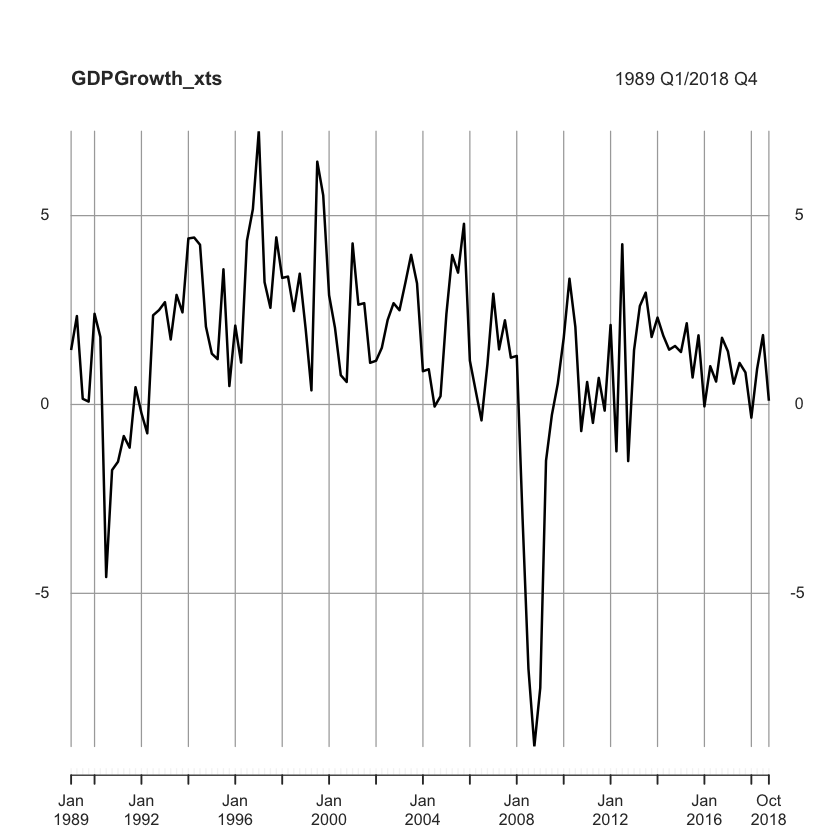

In [12]:
# load UK macroeconomic data
UK_gdp <- read_excel(path = "/Users/jason/Desktop/Applied_Ecoometrics_2/week10/Week10-PartialCodeData/UK_GDPpc_Quarterly-Full.xls")

UK_gdp$Date <- as.yearqtr(UK_gdp$Date, format = "%Y Q%q")
GDP_xts <- xts(UK_gdp$GDPpc, UK_gdp$Date)
GDPGrowth_xts <- xts(400 * log(GDP_xts/lag(GDP_xts)))["1989::2018"]

plot(GDPGrowth_xts)

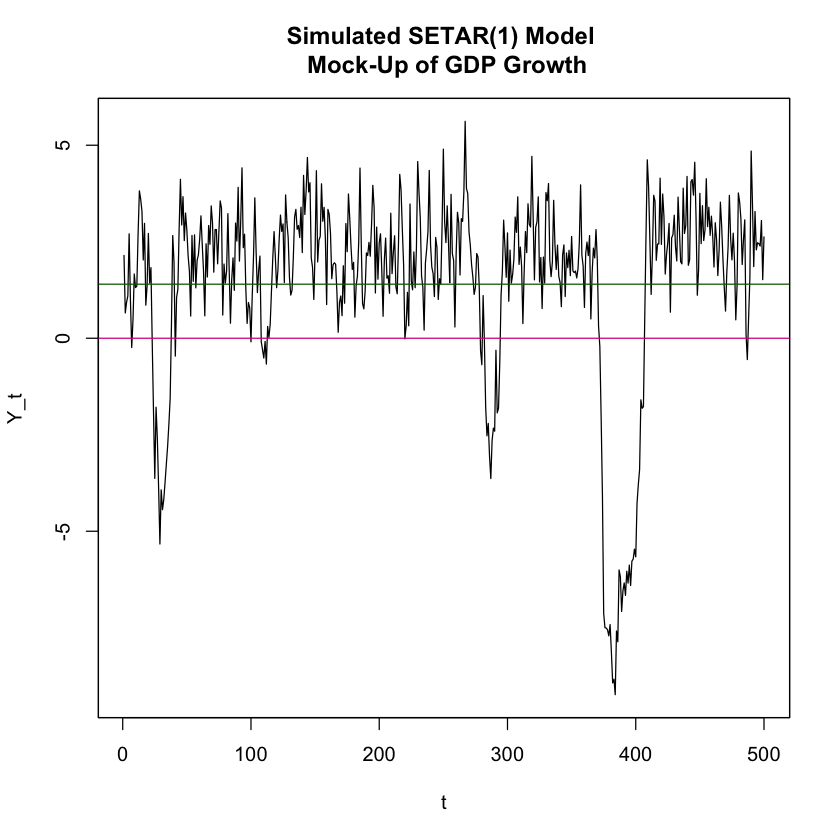

In [13]:
#   Section 2.1.1: Simulate TAR Time Series ---------------------------------------------
# In this section I do the mock-up of the GDP growth, as an example
# of what we can do with Threshold models, and the phenomena they can
# represent:
set.seed(750) # Set seed to replicate the random draw
N <- 500  # Set the number of time periods
# Here we use the tar.sim() command to simulate a TAR.
#   n=N sets the number of periods to simulate
#   Phi1=c(-0.025,0.95) sets the coefficients for the first regime: the intercept is -0.025, the autoregressive coefficient is 0.95
#   Phi2=c(1.4,0.4) sets the coefficients for the first regime: the intercept is 1.4, the autoregressive coefficient is 0.4
#   p=1 means we set the max. autoregressive order is 1.
#   d=1 means that the delay here is 1
#   sigma1 = 1 sets the variance of errors in the first regime
#   sigma2 = 1 sets the variance of errors in the first regime 
#   thd=0 sets 0 as the threshold for switching
#   the $y at the end means we simulate this TAR model and save out y as y_threshold
y_threshold=tar.sim(n=N,Phi1=c(-0.025,0.95),Phi2=c(1.4,0.4),p=1,d=1,sigma1=1,
                    thd=0,sigma2=1)$y
# Here we set up dates (as usual for simulated dates) then we use this to set up
# the threshold time series as an xts
dates = as.yearqtr(seq(1,N))
y_threshold_xts = xts(y_threshold, dates)

#   Section 2.1.2: Plot TAR Time Series ---------------------------------------------
# Now, we plot this:
plot(as.zoo(y_threshold_xts), 
    main = "Simulated SETAR(1) Model \n Mock-Up of GDP Growth",
    ylab = "Y_t",
    xlab = "t")
abline(1.4, 0, col = "darkgreen")
abline(0, 0, col = "violetred")

In [14]:
#   Section 2.1.3: Estimate TAR Model ---------------------------------------------
# Here we set up the tar() command we use to estimate the model:
#   as.vector(y_threshold_xts) is us setting up the time series data as we need 
#     for this package, it needs to be in vector form.
#   p1=1 sets the AR order of the first regime
#   p2=1 sets the AR order of the first regime
#   d=1 sets the delay parameter we are looking for to be 1
#   a=0.1 sets the lower percentile to start searching for a threshold
#   b=0.9 sets the upper percentile to start searching for a threshold
#   is.constant1=TRUE sets that we want the first-regime model to include an intercept
#   is.constant2=TRUE sets that we want the second-regime model to include an intercept
#   print=TRUE sets that the command prints the output
y_tar1_est <- tar(as.vector(y_threshold_xts),p1=1, p2=1, d=1, a=0.1, b= 0.9,is.constant1=TRUE,is.constant2=TRUE, print=TRUE)
# Look at the parameters we estimate: are they close to the actual model we simulated?

y_tar1_threshold = y_tar1_est$thd
y_tar1_coefs_regime1 = y_tar1_est$qr1$coefficients
y_tar1_coefs_regime2 = y_tar1_est$qr2$coefficients

print(y_tar1_threshold)
print(y_tar1_coefs_regime1)
print(y_tar1_coefs_regime2)

time series included in this analysis is:  as.vector(y_threshold_xts) 
SETAR(2, 1 , 1 ) model delay = 1 
estimated threshold =  0.09942  from a Minimum AIC  fit with thresholds 
searched from the  10  percentile to the   90  percentile of all data.
The estimated threshold is the  15.4  percentile of
all data.
lower regime: 
Residual Standard Error=1.0742
R-Square=0.946
F-statistic (df=2, 75)=656.5794
p-value=0

                                     Estimate Std.Err t-value Pr(>|t|)
intercept-as.vector(y_threshold_xts)   0.0552  0.2022  0.2731   0.7855
lag1-as.vector(y_threshold_xts)        0.9839  0.0444 22.1516   0.0000




 (unbiased) RMS 
1.154 
 with no of data falling in the regime being 
as.vector(y_threshold_xts) 77 


 (max. likelihood) RMS for each series (denominator=sample size in the regime) 
as.vector(y_threshold_xts) 1.124 


 upper regime: 
Residual Standard Error=0.9762
R-Square=0.851
F-statistic (df=2, 420)=1199.393
p-value=0

                                     Estima

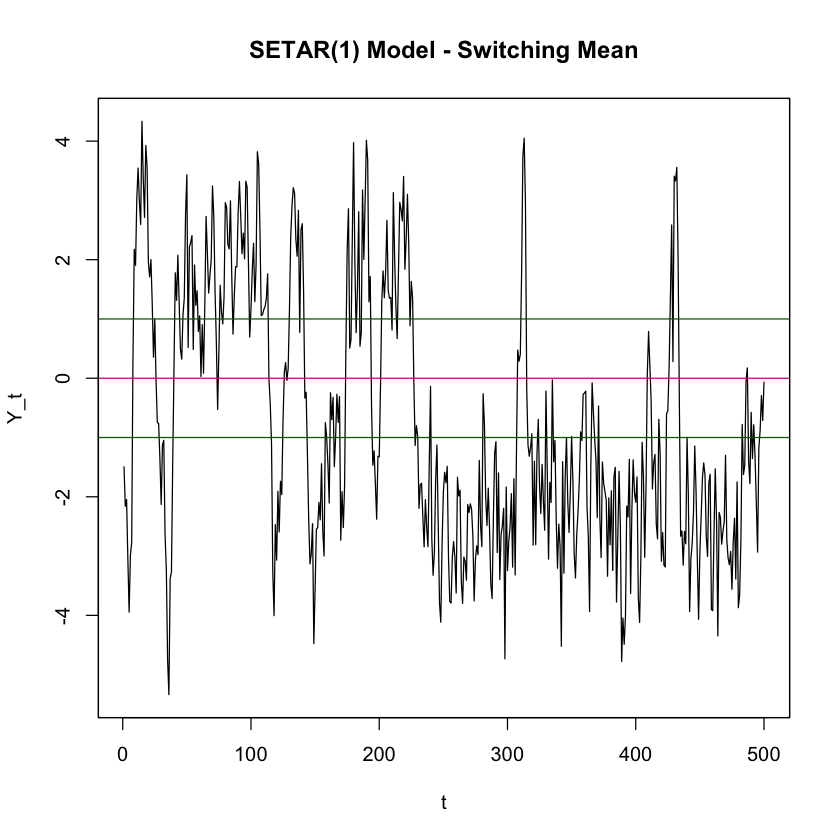

In [15]:
set.seed(150)
N <- 500
# Here we use the tar.sim() command to simulate a TAR.
#   n=N sets the number of periods to simulate
#   Phi1=c(-1,0.5) sets the coefficients for the first regime: the intercept is -1, the autoregressive coefficient is 0.5
#   Phi2=c(1,0.5) sets the coefficients for the first regime: the intercept is 1, the autoregressive coefficient is 0.5
#   p=1 means we set the max. autoregressive order is 1.
#   d=1 means that the delay here is 1
#   sigma1 = 1 sets the variance of errors in the first regime
#   sigma2 = 1 sets the variance of errors in the first regime 
#   thd=0 sets 0 as the threshold for switching
#   the $y at the end means we simulate this TAR model and save out y as y_threshold
y_threshold=tar.sim(n=N,Phi1=c(-1,0.5),Phi2=c(1,0.5),p=1,d=1,sigma1=1,
            thd=0,sigma2=1)$y
# Here we set up dates (as usual for simulated dates) then we use this to set up
# the threshold time series as an xts
dates = as.yearqtr(seq(1,N))
y_threshold1_xts = xts(y_threshold, dates)

#   Section 2.2.2: Plot TAR Time Series ------------------------------------------
plot(as.zoo(y_threshold1_xts),
     main = "SETAR(1) Model - Switching Mean",
     ylab = "Y_t",
     xlab = "t")
abline(1, 0, col = "darkgreen")
abline(0, 0, col = "violetred")
abline(-1, 0, col = "darkgreen")

In [16]:
#   Section 2.2.3: Estimate TAR Model ------------------------------------------
# Here we set up the tar() command we use to estimate the model:
#   as.vector(y_threshold1_xts) is us setting up the time series data as we need 
#     for this package, it needs to be in vector form.
#   p1=1 sets the AR order of the first regime
#   p2=1 sets the AR order of the first regime
#   d=1 sets the delay parameter we are looking for to be 1
#   a=0.1 sets the lower percentile to start searching for a threshold
#   b=0.9 sets the upper percentile to start searching for a threshold
#   is.constant1=TRUE sets that we want the first-regime model to include an intercept
#   is.constant2=TRUE sets that we want the second-regime model to include an intercept
#   print=TRUE sets that the command prints the output
y_tar2_est <- tar(as.vector(y_threshold1_xts),p1=1, p2=1, d=1, a=0.1, b= 0.9,is.constant1=TRUE,is.constant2=TRUE, print=TRUE)

y_tar2_threshold = y_tar2_est$thd
y_tar2_coefs_regime1 = y_tar2_est$qr1$coefficients
y_tar2_coefs_regime2 = y_tar2_est$qr2$coefficients

print(y_tar2_threshold)
print(y_tar2_coefs_regime1)
print(y_tar2_coefs_regime2)

time series included in this analysis is:  as.vector(y_threshold1_xts) 
SETAR(2, 1 , 1 ) model delay = 1 
estimated threshold =  -0.0186  from a Minimum AIC  fit with thresholds 
searched from the  10  percentile to the   90  percentile of all data.
The estimated threshold is the  65.9  percentile of
all data.
lower regime: 
Residual Standard Error=0.9902
R-Square=0.8282
F-statistic (df=2, 327)=788.2776
p-value=0

                                      Estimate Std.Err t-value Pr(>|t|)
intercept-as.vector(y_threshold1_xts)  -1.0121  0.1204 -8.4081        0
lag1-as.vector(y_threshold1_xts)        0.5104  0.0505 10.1051        0




 (unbiased) RMS 
0.9804 
 with no of data falling in the regime being 
as.vector(y_threshold1_xts) 329 


 (max. likelihood) RMS for each series (denominator=sample size in the regime) 
as.vector(y_threshold1_xts) 0.9745 


 upper regime: 
Residual Standard Error=1.0055
R-Square=0.7836
F-statistic (df=2, 168)=304.2041
p-value=0

                               

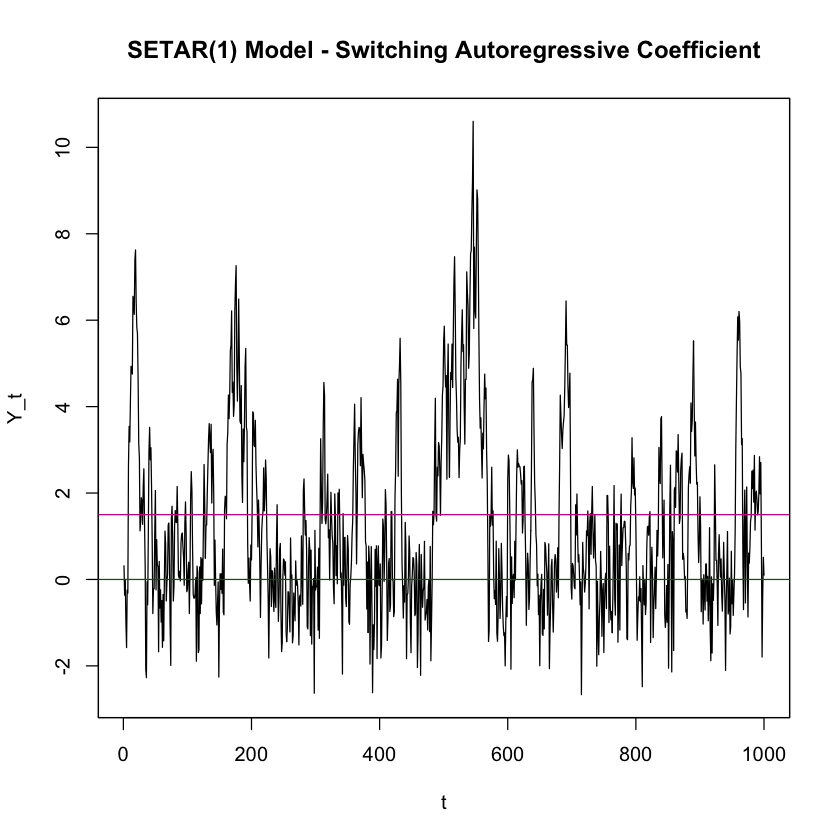

In [17]:
set.seed(150)
N <- 1000
# Here we use the tar.sim() command to simulate a TAR.
#   n=N sets the number of periods to simulate
#   Phi1=c(-1,0.5) sets the coefficients for the first regime: the intercept is -1, the autoregressive coefficient is 0.5
#   Phi2=c(1,0.5) sets the coefficients for the first regime: the intercept is 1, the autoregressive coefficient is 0.5
#   p=1 means we set the max. autoregressive order is 1.
#   d=1 means that the delay here is 1
#   sigma1 = 1 sets the variance of errors in the first regime
#   sigma2 = 1 sets the variance of errors in the first regime 
#   thd=0 sets 0 as the threshold for switching
#   the $y at the end means we simulate this TAR model and save out y as y_threshold
y_threshold=tar.sim(n=N,Phi1=c(0,0.15),Phi2=c(0,0.95),p=1,d=1,sigma1=1,
                    thd=1,sigma2=1)$y
# Here we set up dates (as usual for simulated dates) then we use this to set up
# the threshold time series as an xts
dates = as.yearqtr(seq(1,N))
y_threshold2_xts = xts(y_threshold, dates)

#   Section 2.3.2: Plot TAR Time Series ------------------------------------------
plot(as.zoo(y_threshold2_xts),
     main = "SETAR(1) Model - Switching Autoregressive Coefficient",
     ylab = "Y_t",
     xlab = "t")
abline(1.5, 0, col = "violetred")
abline(0, 0, col = "darkgreen")

In [18]:
#   Section 2.3.3: Estimate TAR Model ------------------------------------------
# Here we set up the tar() command we use to estimate the model:
#   as.vector(y_threshold_xts) is us setting up the time series data as we need 
#     for this package, it needs to be in vector form.
#   p1=1 sets the AR order of the first regime
#   p2=1 sets the AR order of the first regime
#   d=1 sets the delay parameter we are looking for to be 1
#   a=0.1 sets the lower percentile to start searching for a threshold
#   b=0.9 sets the upper percentile to start searching for a threshold
#   is.constant1=TRUE sets that we want the first-regime model to include an intercept
#   is.constant2=TRUE sets that we want the second-regime model to include an intercept
#   print=TRUE sets that the command prints the output
y_tar3_est <- tar(as.vector(y_threshold2_xts),p1=1, p2=1, d=1, a=0.1, b= 0.9,is.constant1=TRUE,is.constant2=TRUE, print=TRUE)

y_tar3_threshold = y_tar3_est$thd
y_tar3_coefs_regime1 = y_tar3_est$qr1$coefficients
y_tar3_coefs_regime2 = y_tar3_est$qr2$coefficients

print(y_tar3_threshold)
print(y_tar3_coefs_regime1)
print(y_tar3_coefs_regime2)

time series included in this analysis is:  as.vector(y_threshold2_xts) 
SETAR(2, 1 , 1 ) model delay = 1 
estimated threshold =  0.9592  from a Minimum AIC  fit with thresholds 
searched from the  10  percentile to the   90  percentile of all data.
The estimated threshold is the  53.7  percentile of
all data.
lower regime: 
Residual Standard Error=0.9607
R-Square=0.0222
F-statistic (df=2, 534)=6.0751
p-value=0.0025

                                      Estimate Std.Err t-value Pr(>|t|)
intercept-as.vector(y_threshold2_xts)  -0.1052  0.0442 -2.3790   0.0177
lag1-as.vector(y_threshold2_xts)        0.0833  0.0531  1.5675   0.1176




 (unbiased) RMS 
0.9229 
 with no of data falling in the regime being 
as.vector(y_threshold2_xts) 536 


 (max. likelihood) RMS for each series (denominator=sample size in the regime) 
as.vector(y_threshold2_xts) 0.9195 


 upper regime: 
Residual Standard Error=1.0673
R-Square=0.9034
F-statistic (df=2, 461)=2154.671
p-value=0

                             

     1    2
1 0.95 0.05
2 0.05 0.95


Warning message in mean.default(newX[, i], ...):
“argument is not numeric or logical: returning NA”
Warning message in FUN(newX[, i], ...):
“NAs introduced by coercion”


ERROR: Error in max(c(p1, p2, d)) + 1: non-numeric argument to binary operator


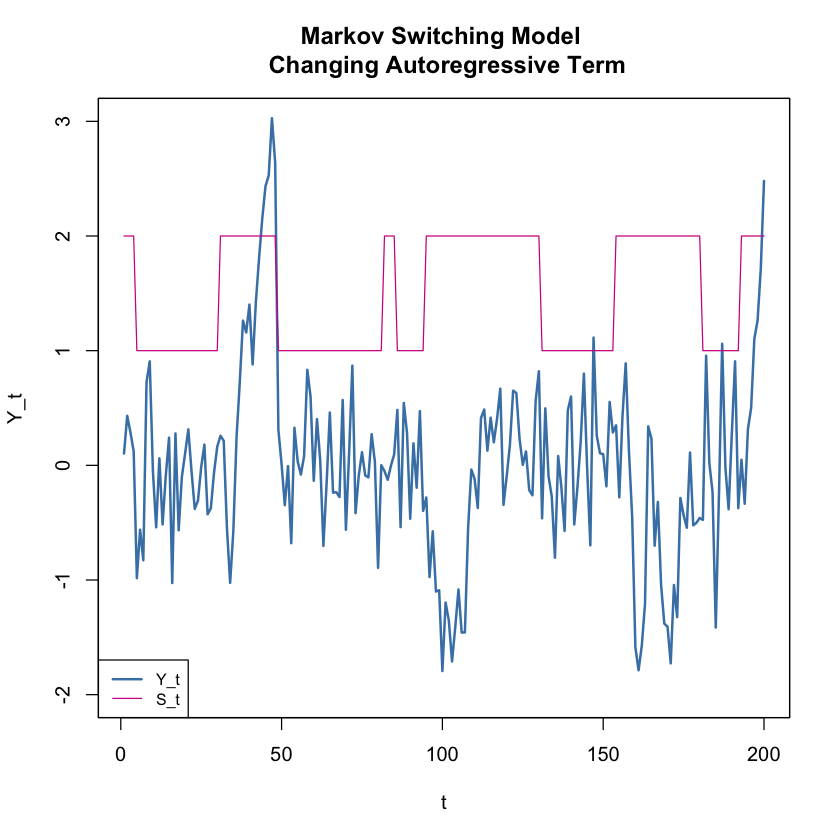

In [19]:
# Section 3: MARKOV SWITCHING TIME SERIES: Changing Autocorrelation ======================
#   Section 3.1: Simulate Markovchain and Markov Switching Time Series ----
set.seed(250) ## set seed to replicate randomization

N <- 200
# define the markovchain object that controls the regime the time series is in:
# We have to give the names of our two states: these could be strings, or 
#     names, or whatever you want.
statesNames <- c("1", "2")
# create the transition matrix P. The way this works is we give the values
#   in the first row, then the values in the second row. We also give it the
#   names of the two states to use as column and row names
P = matrix(c(0.95, 0.05, 0.05, 0.95),
       nrow = 2, byrow = TRUE, dimnames = list(statesNames, statesNames))
# print the matrix to see what it looks like:
print(P)
#   Now, we use the transition matrix P and the names of states to give
#     the parameters of the markovchain object
MarkocChainParameters <- new("markovchain", states = statesNames, transitionMatrix = P)
# Now, set up an empty array of length N
markov_chain_sim <- array(dim = N)
# Now, use the rmarkovchain() to fill this array with simulated values:
markov_chain_sim <- rmarkovchain(n = N, object = MarkocChainParameters, what = "matrix")
markov_chain = as.numeric(markov_chain_sim)

Y_markov_switching <- array(dim = N)
u <- 0.5*rnorm(N)   

beta_01 = 0
beta_02 = 0

beta_11 = 0.02
beta_12 = 0.95

Y_markov_switching[1] = u[1]

for (t in 2:N) {
  if (markov_chain[t] == 1) {
    Y_markov_switching[t] = beta_01 + (beta_11 * Y_markov_switching[t-1]) + u[t]
  }
  else if (markov_chain[t] == 2) {
    Y_markov_switching[t] = beta_02 + (beta_12 * Y_markov_switching[t-1]) + u[t]
  }  
}
dates = as.yearqtr(seq(1,N))
Y_markov_switching_xts=xts(Y_markov_switching, dates)

#   Section 3.2: Plot Markov Switching Time Series ----
markov_chain_xts = xts(markov_chain, dates)
plot(as.zoo(Y_markov_switching_xts), lwd = 2, col = 'steelblue',
     main = "Markov Switching Model \n Changing Autoregressive Term",
     ylab = "Y_t",
     ylim = c(-2,3),
     xlab = "t")
lines(as.zoo(markov_chain_xts), col = "violetred")
legend("bottomleft",
       lty = c(1, 1),
       lwd = c(2, 1),
       cex = 0.8,
       col = c("steelblue", "violetred"),
       legend = c("Y_t", "S_t"))

#   Section 3.3: Estimate Markov Switching Time Series Model ----

#   We use the msmFit function to fit the Markov Switching Model, after
#     first specifying the model we want it to fit:
model=lm(Y_markov_switching_xts~lag(Y_markov_switching_xts))
mod=msmFit(model,k=2,sw=c(TRUE,TRUE,TRUE))
# k indicates the number of regimes we want it to fit
# sw=c(TRUE,TRUE,TRUE) tells it that the Intercept, the Autoregressive Term and the Std. Error
# are all allowed to be switching.

#   Now, we extract the key outcomes from this model fit and compare to true values.
#   We know the true value of the parameters are:
#     First regime: beta_0 = 0, beta_1 = 0.02
#     Second regime: beta_0 = 0, beta_1 = 0.95
#     Transition Matrix: p11=0.95, p12=0.05, p21=0.05, p22=0.95
TransitionMatrix_estimated = t(mod@transMat)
MarkovSwitchingCoefs_estimated = mod@Coef
# Section 4: Estimate Switching Models of GDP ==================================

#   Recall: your time series object for GDP growth is GDPGrowth_xts
#   Section 4.1: Threshold Model of GDP Growth ---------------------------------
# Here we set up the tar() command we use to estimate the model on GDPGrowth_xts.
#   Remember we need to use the function as.vector() to use our input xts.
GDP_tar_est <- tar("INSERT DATA HERE TO BE USED",p1="INSERT ORDER OF REGIME 1", p2="INSERT ORDER OF REGIME 1", d="INSERT DELAY", a=0.1, b= 0.9,is.constant1=TRUE,is.constant2=TRUE, print=TRUE)

GDP_threshold = GDP_tar_est$thd
GDP_coefs_regime1 = GDP_tar_est$qr1$coefficients
GDP_coefs_regime2 = GDP_tar_est$qr2$coefficients

print(GDP_threshold)
print(GDP_coefs_regime1)
print(GDP_coefs_regime2)

In [20]:
# What sort of parameters do we get? What does this tell us about the threshold?
# How does GDP growth behave in each Regime?
#   Section 4.2: Estimate Markov Switching Model of GDP Growth ----

#   We use the msmFit function to fit the Markov Switching Model, after
#     first specifying the model we want it to fit on the data GDPGrowth_xts
model_GDP=lm("WRITE IN THE MARKOV MODEL YOU WANT TO ESTIMATE")
mod_GDP=msmFit(model_GDP,k="NUMBER OF REGIMES",sw=c(TRUE,TRUE,TRUE))

#   Now, we extract the key outcomes from this model fit and compare to true values.
TransitionMatrix_estimated = t(mod_GDP@transMat)
MarkovSwitchingCoefs_estimated = mod_GDP@Coef

ERROR: Error in str2lang(x): <text>:1:7: unexpected symbol
1: WRITE IN
          ^
